Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


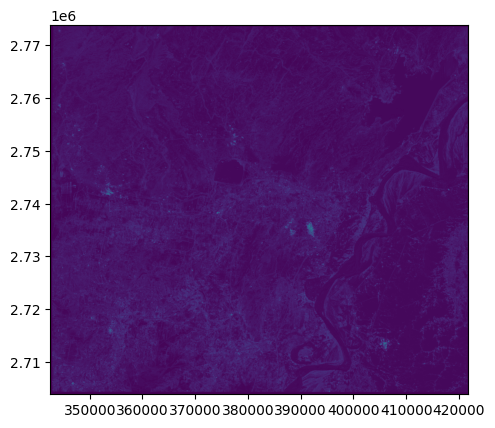

<Axes: >

In [11]:
from google.colab import drive
drive.mount('/content/drive')
!pip install rasterio geopandas tifffile Pillow
import rasterio
from rasterio.plot import show
import tifffile
from PIL import Image
img = rasterio.open("/content/drive/MyDrive/Thatta TIFF.tif")
show(img)

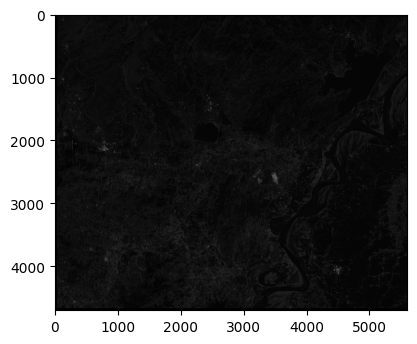

In [12]:
import matplotlib.pyplot as plt
img_band1 = img.read(1)
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(2, 2, 1)
# Add your plotting code here using ax1

# For example, you can show the image using imshow:
ax1.imshow(img_band1, cmap='gray')

plt.show()

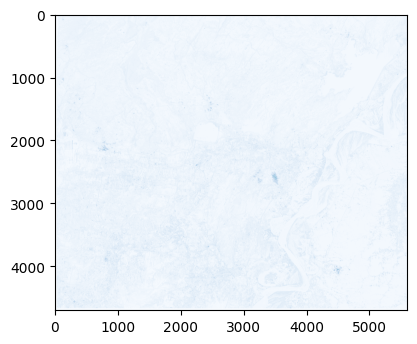

In [14]:
import matplotlib.pyplot as plt
img_band2 = img.read(1)
fig2 = plt.figure(figsize=(10, 10))
ax2 = fig2.add_subplot(2, 2, 2)
# Add your plotting code here using ax1

# For example, you can show the image using imshow:
ax2.imshow(img_band2, cmap='Blues')

plt.show()

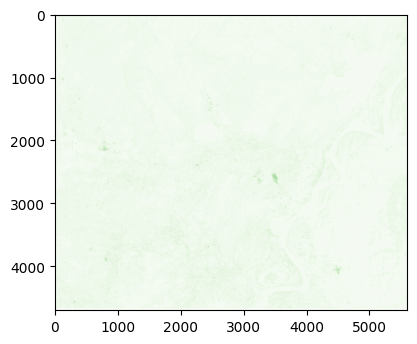

In [16]:
import matplotlib.pyplot as plt
img_band3 = img.read(1)
fig3 = plt.figure(figsize=(10, 10))
ax3 = fig3.add_subplot(2, 2, 3)
# Add your plotting code here using ax1

# For example, you can show the image using imshow:
ax3.imshow(img_band3, cmap='Greens')

plt.show()

In [19]:
import rasterio

# Open the GeoTIFF image
with rasterio.open("/content/drive/MyDrive/Thatta TIFF.tif") as dataset:
    # Check the size (dimensions)
    width = dataset.width
    height = dataset.height
    print("Image Size (Width x Height):", width, "x", height)

     # Check the number of bands
    num_bands = dataset.count
    print("Number of Bands:", num_bands)

Image Size (Width x Height): 5600 x 4700
Number of Bands: 1


metadata {'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 5600, 'height': 4700, 'count': 1, 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 42N",GEOGCS["ITRF97 (geocentric)",DATUM["International_Terrestrial_Reference_Frame_1997",SPHEROID["GRS 1980",6378137,298.257221538149,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6655"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4338"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",69],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32642"]]'), 'transform': Affine(12.305366438119368, 2.1844525256131697, 342561.7588999999,
       2.1845272273524823, -12.304945405475523, 2761670.814875)}
Raster Decription: (None,)



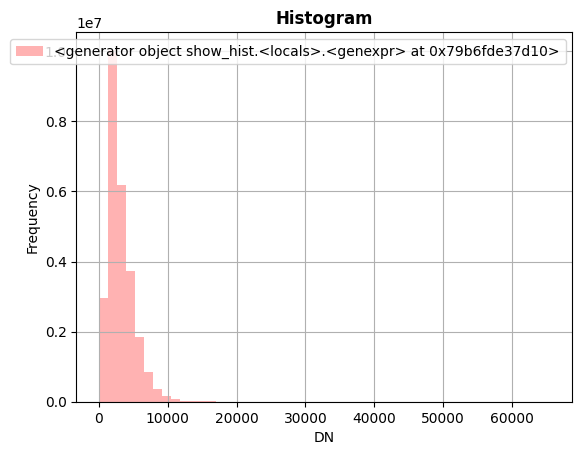

In [20]:
img.crs
metadata=img.meta
print("metadata", metadata)
desc=img.descriptions
print("Raster Decription: {desc}\n".format(desc=desc))
rasterio.plot.show_hist(img, bins=50, histtype='stepfilled', lw=0.0, stacked=False, alpha=0.3)

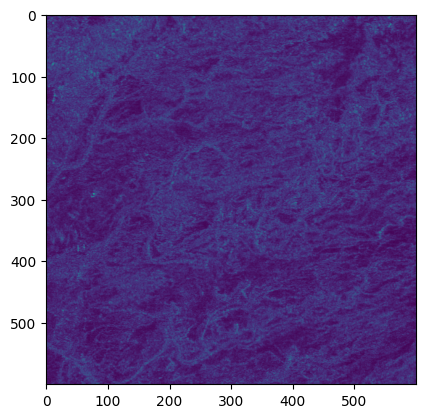

In [22]:
import rasterio
import matplotlib.pyplot as plt

# Open the raster image using rasterio
with rasterio.open('/content/drive/MyDrive/Thatta TIFF.tif', 'r') as src:
    # Read the data (bands) from the raster dataset
    img = src.read()

# Assuming you want to clip the data to a specific region within the raster
# For example, here we are clipping the region from rows 300 to 900 and columns 300 to 900
clipped_img = img[:, 300:900, 300:900]

# Visualize the clipped image (assuming it is a 3-band image)
plt.imshow(clipped_img.transpose(1, 2, 0))  # Transpose to (height, width, bands) for visualization
plt.show()
# clipped_img = img[:, 300:900, 300:900]
# plt.imshow(clipped_img[0,:,:])

<ipython-input-28-9383d7daef94>:3: RuntimeWarning: invalid value encountered in divide
  ndvi_clipped = (nir_clipped - red_clipped) / (nir_clipped + red_clipped)
<ipython-input-28-9383d7daef94>:5: RuntimeWarning: invalid value encountered in divide
  ndvi_clipped2 = np.divide(np.subtract(nir_clipped, red_clipped), np.add(nir_clipped, red_clipped))


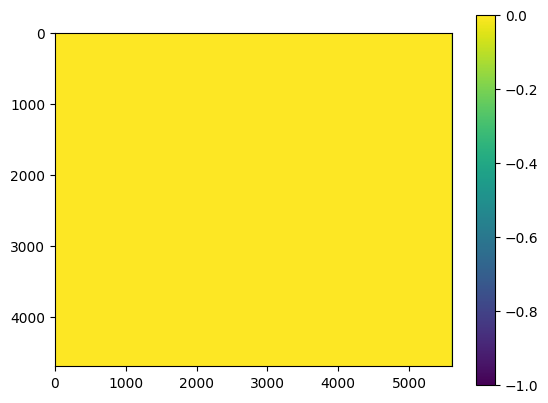

In [28]:
red_clipped = img[0].astype('f4')
nir_clipped = img[0].astype('f4')
ndvi_clipped = (nir_clipped - red_clipped) / (nir_clipped + red_clipped)
import numpy as np
ndvi_clipped2 = np.divide(np.subtract(nir_clipped, red_clipped), np.add(nir_clipped, red_clipped))
ndvi_clipped3 = np.nan_to_num(ndvi_clipped2, nan=-1)
plt.imshow(ndvi_clipped3, cmap='viridis')
plt.colorbar()